### One sample t-test

The t-test is used when the population standard deviation *S* is unknown and is estimated from the sample.

$t-statistics = \frac{(\bar{X} - \mu)}{\frac{S}{\sqrt{n}}}$


For example, Aravind Productions (AP) is a newly formed movie production house based out of Mumbai, India. AP was interested in understanding the production cost required for producing a Bollywood movie. The industry believes that the production house will require at least INR 500 million (50 crore) on average. It is assumed that the Bollywood movie production cost follows a normal distribution. Production cost of 40 Bollywood movies in millions of rupees are given in *bollywoodmovies.csv* file. Conduct an appropriate hypothesis test at $\alpha$ = 0.05 to check whether the belief about average production cost is correct.


In [ ]:
import pandas as pd
# Read the CSV file into a DataFrame
df_bollywood_movies = pd.read_csv('bollywoodmovies.csv')
print(df_bollywood_movies)

$H_{0}$: $\mu =$ 500

$H_{A}$: $\mu \ne$ 500


*scipy.stats.ttest_1samp()* can be used to doing this test. It takes two parameters:

- a : array_like - sample observation
- popmean : float - expected value in null hypothesis.

In [ ]:
# Perform t test
from scipy import stats
# Assuming 'production cost' is the column we want to perform the t-test on
t_statistic, p_value = stats.ttest_1samp(df_bollywood_movies['production_cost'], 500)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Make inference for p value if alpha is 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean production cost is significantly different from 500.")
else:
    print("Fail to reject the null hypothesis: The mean production cost is not significantly different from 500.")

### Two sample t-test

Two sample t-test is required to test difference between two population means, but standard deviations are unknown. The parameters are estimated by the samples.

For example, a company makes a claim that children (in the age group between 7 and 12) who drink their health drink will grow taller than the children who do not drink that health drink. Data in Table 6.10 shows average increase in height over one-year period from two groups: one drinking the health drink and the other not drinking the health drink. At $\alpha$ = 0.05, test whether the increase in height for the children who drink the health drink is different than those who do not drink health drink. 

In [20]:
# Read healthdrink data from excel file
df_healthdrink_yes = pd.read_excel('healthdrink.xlsx', sheet_name='healthdrink_yes')
df_healthdrink_no = pd.read_excel('healthdrink.xlsx', sheet_name='healthdrink_no')
print(df_healthdrink_yes)
print(df_healthdrink_no)

    height_increase
0               8.6
1               5.8
2              10.2
3               8.5
4               6.8
..              ...
74              6.5
75              8.1
76              7.2
77              8.8
78              9.8

[79 rows x 1 columns]
    height_increase
0               5.3
1               9.0
2               5.7
3               5.5
4               5.4
..              ...
75              4.4
76              5.3
77              6.2
78              7.4
79              4.2

[80 rows x 1 columns]


In [23]:
# Perform 2 sample t test on df_healthdrink_yes and df_healthdrink_no
t_statistic, p_value = stats.ttest_ind(df_healthdrink_yes['height_increase'], df_healthdrink_no['height_increase'])
print(f"T-statistic: {t_statistic}, P-value: {p_value}")



T-statistic: 8.131675069083359, P-value: 1.197698592263946e-13


### Paired sample t-test

- Sometimes to analyze whether an intervention (or treatment) such as an event, a training programs, marketing promotions, treatment for specific illness. 

- The objective in this case is to check whether the difference in the parameter values is statistically significant before and after the intervention or between two different types of interventions. 

- This is called paired sample t-test and is used used for comparing two different interventions applied on the same samples.

Consider the following example for a paired t-test.

The file *breakups.csv* contains alcohol consumption before and after breakup. Conduct a paired t-test to check whether the alcohol consumption is more after the breakup at 95% confidence ($\alpha$ = 0.05).

    Before_Breakup  After_Breakup
0              470            408
1              354            439
2              496            321
3              351            437
4              349            335
5              449            344
6              378            318
7              359            492
8              469            531
9              329            417
10             389            358
11             497            391
12             493            398
13             268            394
14             445            508
15             287            399
16             338            345
17             271            341
18             412            326
19             335            467
T-statistic: -0.5375404241815106, P-value: 0.5971346738292477
Fail to reject the null hypothesis: The mean difference in scores before and after breakup is not significant.


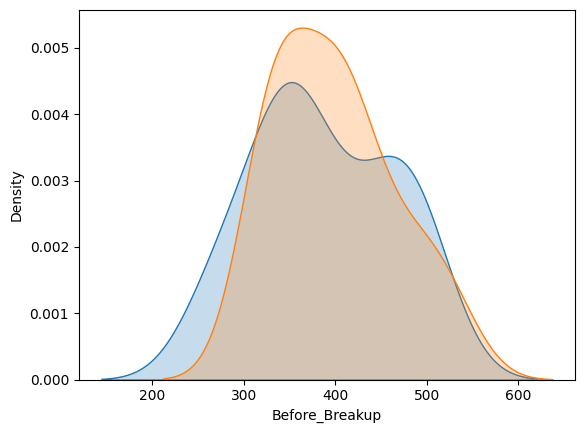

In [36]:
# Paired Sample T-test
import pandas as pd

# Read breakups.csv file
df_breakups = pd.read_csv('breakups.csv')
print(df_breakups)

# Craete distribution plot for Before_Breakup and After_Breakup
import seaborn as sns

# kde plot
sns.kdeplot(df_breakups['Before_Breakup'], label='Before Breakup', fill=True)
sns.kdeplot(df_breakups['After_Breakup'], label='After Breakup', fill=True)

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(df_breakups['Before_Breakup'], df_breakups['After_Breakup'])
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
# Make inference for p value if alpha is 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean difference in scores before and after breakup is significant.")
else:
    print("Fail to reject the null hypothesis: The mean difference in scores before and after breakup is not significant.")


